This tutorial presents how to solve with PINN method for a 1D Poisson problem with Dirichlet boundary conditions.

The problem is written as:
\begin{equation}
\begin{cases}
-\nabla \cdot \left ( a(x) \nabla u(x) \right ) = f(x) \text{ in } D, \\
u = 0 \text{ on } \Gamma_1 \cup \Gamma_2,
\end{cases}
\end{equation}
where $D$ is a square domain $[0,1]$, and $\Gamma_i$, with $i=1,2$, are the boundaries of the interval. Here,
\begin{equation}
a(x) = 
\begin{cases}
\frac{1}{2}, \; \text{ if } -1 < x < 0, \\
1, \; \text{ if } 0 \le x < 1,
\end{cases}
\end{equation}
and
\begin{equation}
f(x) = 
\begin{cases}
0, \; \text{ if } -1 < x < 0, \\
-2, \; \text{ if } 0 \le x < 1.
\end{cases}
\end{equation}
One can check that the exact solution is 
\begin{equation}
u(x) = 
\begin{cases}
\frac{2}{3} (x+1), \; \text{ if } -1 < x < 0, \\
x^2 - \frac{1}{3} x - \frac{2}{3}, \; \text{ if } 0 \le x < 1.
\end{cases}
\end{equation}

In [1]:
import numpy as np
import torch
from torch.nn import Tanh


from problem.pinn import PINN
from model.feed_forward import FeedForward
from problem.plotter import Plotter

from model.feed_forward import FeedForward
from poisson import Posisson1D_pinn as Poisson

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

problem = Poisson()
model = FeedForward(
    layers=[64, 64, 64, 64],
    func=Tanh,
    output_variables=problem.output_variables,
    input_variables=problem.input_variables
)
num_pts = 1000

pinn = PINN(
    problem,
    model,
    lr=0.001,
    error_norm='mse',
    regularizer=1e-8, 
    batch_size=num_pts,
    device=device,
    )



In [3]:
pinn.span_pts(n=1, mode='grid', locations=['gamma1', 'gamma2'])
pinn.span_pts(n=num_pts, mode='grid', locations=['D'])
data = pinn.data_set.dataloader
# for b in data["gamma1"]:
#     print(b, b["gamma1"].shape)
# for c in data["gamma2"]:
#     print(c, c["gamma2"].shape)    

pinn.train(10000, 100)
# pinn.save_state('pina.poisson')

              sum          gamma1nil_di gamma2nil_di Dpinn_equati 
[epoch 00000] 1.948449e+00 2.404084e-04 3.161978e-03 1.945047e+00 
              sum          gamma1nil_di gamma2nil_di Dpinn_equati 
[epoch 00001] 1.858094e+00 9.993245e-03 3.437850e-02 1.813722e+00 
              sum          gamma1nil_di gamma2nil_di Dpinn_equati 
[epoch 00100] 4.152993e-02 1.978733e-05 2.328998e-05 4.148686e-02 
              sum          gamma1nil_di gamma2nil_di Dpinn_equati 
[epoch 00200] 2.273668e-02 3.478699e-08 2.986303e-08 2.273661e-02 
              sum          gamma1nil_di gamma2nil_di Dpinn_equati 
[epoch 00300] 1.969934e-02 1.097741e-07 1.710194e-07 1.969905e-02 
              sum          gamma1nil_di gamma2nil_di Dpinn_equati 
[epoch 00400] 1.673114e-02 7.960533e-12 8.309245e-09 1.673113e-02 
              sum          gamma1nil_di gamma2nil_di Dpinn_equati 
[epoch 00500] 1.332671e-02 3.112384e-08 1.058012e-07 1.332657e-02 
              sum          gamma1nil_di gamma2nil_di Dpinn_equ

0.0016076252795755863

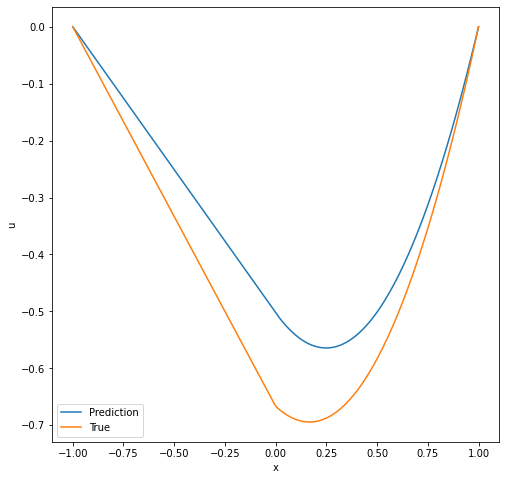

In [4]:
plotter = Plotter()
plotter.plot(pinn)